In [14]:
import warnings

warnings.filterwarnings('ignore')

In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.datasets import mnist

from models.MnistClassifier import MnistClassifier

Check if models have been trained

In [4]:
trained_model_dir = os.path.join(os.getcwd(), "trained_models")
if os.path.exists(trained_model_dir) and os.path.isdir(trained_model_dir):
    files_in_directory = os.listdir(trained_model_dir)
    if files_in_directory:
        print(f"There are prepared trained models in {trained_model_dir}.\nYou can continue example")
    else:
        print(f"Please run train.py to train and save models")
else:
    print(f"Please run train.py to train and save models")


There are prepared trained models in D:\Projects\Winstars.AI_test_task\1_image_classification_OOP\trained_models.
You can continue example


1. Load MNIST dataset, which contains handwritten digits and their corresponding labels.
2. Reshape the data for training models, flattening the 28x28 images into 784-dimensional vectors.
3. Normalize the pixel values to a range of 0-1 by dividing by 255.0

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((-1, 28*28)).astype('float32')/255
X_test = X_test.reshape((-1, 28*28)).astype('float32')/255

Load the pre-trained Random Forest model from file and evaluate its performance on test data

In [18]:
rf_model = MnistClassifier('rf', model_path=os.path.join(trained_model_dir, "mnist_rf_model.pkl"))
print(rf_model.score(X_test, y_test))

Model loaded from D:\Projects\Winstars.AI_test_task\1_image_classification_OOP\trained_models\mnist_rf_model.pkl
0.9702


Load the pre-trained Feedforward Neural Network model from file and evaluate its performance on test data

In [15]:
nn_model = MnistClassifier('nn', model_path=os.path.join(trained_model_dir, "mnist_nn_model.h5"))
print(nn_model.score(X_test, y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9766 - loss: 0.0922
0.9801999926567078


Load the pre-trained Convolutional Neural Network model from file and evaluate its performance on test data

In [16]:
cnn_model = MnistClassifier('cnn', model_path=os.path.join(trained_model_dir, "mnist_cnn_model.h5"))
print(cnn_model.score(X_test, y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9903 - loss: 0.0319
0.9926000237464905


Create class predictions of all three models.

In [31]:
rf_predictions = rf_model.predict(X_test)
nn_predictions = np.argmax(nn_model.predict(X_test), axis=1)
cnn_predictions = np.argmax(cnn_model.predict(X_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


Visualize test images and corresponding class predictions of Random Forest, Feedforward NN and CNN

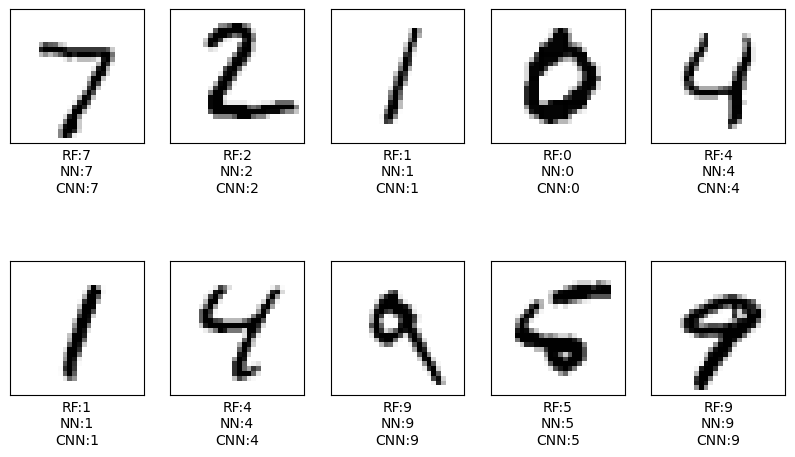

In [38]:
plt.figure(figsize=(10,6))
for i in range(0, 10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = X_test[i]
    img = img.reshape((28, 28))
    plt.imshow(img, cmap=plt.cm.binary)

    plt.xlabel(f"RF:{rf_predictions[i]}\nNN:{nn_predictions[i]}\nCNN:{cnn_predictions[i]}")